In [77]:
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
%matplotlib inline
import quandl as Quandl
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
data_DF=pd.read_csv('C:\\Users\\tzcha\\Documents\\other\\CNG.csv',parse_dates=[0])

In [78]:
data_DF=data_DF.dropna()

In [79]:
yield_DF=pd.read_csv('C:\\Users\\tzcha\\Documents\\other\Yield.csv',parse_dates=[0])

In [80]:
yield_DF=yield_DF.dropna(subset=['AAA1y'])
yield_DF.values[-1]

array([Timestamp('2008-08-21 00:00:00'), 2.938, nan, nan, 4.5655, nan,
       4.82, 5.2255, 5.3948, 5.5356, 5.6575, 5.7983, 5.9454, 6.0439,
       6.087999999999999, 6.132000000000001, 6.2611, 6.3845, 6.4247],
      dtype=object)

In [81]:
x_data=[]
X1=data_DF['Time'].values
for dt in X1:
    dt_num = dates.date2num(dt)
    x_data.append([dt_num for i in range(data_DF.shape[1]-1)])
print('x_data: ', x_data[:4])

x_data:  [[737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0], [737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0], [737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0], [737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0]]


In [93]:
x_data_yield=[]
X1_yield=yield_DF['Time'].values
for dt in X1_yield:
    dt_num = dates.date2num(dt)
    x_data_yield.append([dt_num for i in range(yield_DF.shape[1]-1)])
print('x_data_yield: ', x_data_yield[:4])

x_data_yield:  [[737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0, 737031.0], [737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0, 737028.0], [737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0, 737027.0], [737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0, 737026.0]]


In [92]:
y_data_yield=[]
Y1_yield=yield_DF.columns
Y1_yield=[0,1/12,3/12,6/12,9/12,1,2,3,4,5,6,7,8,9,10,15,20,30]
for i in range(yield_DF.shape[0]):
    y_data_yield.append(Y1_yield)

In [84]:
y_data=[]
Y1=data_DF.columns
Y1=[0,1/12,2/12,3/12,6/12,9/12,1,3,5,7,10,15,20,30,40,50]
for i in range(data_DF.shape[0]):
    y_data.append(Y1)

In [85]:
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

In [86]:
z_data=[]
z_all=data_DF
z_data=z_all.convert_objects(convert_numeric=True)
z_data=z_data.values
z_data=z_data[:,1:].astype('float')

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [87]:
z_data_yield=[]
z_all_yield=yield_DF
z_data_yield=z_all_yield.convert_objects(convert_numeric=True)
z_data_yield=z_data_yield.values
z_data_yield=z_data_yield[:,1:].astype('float')

C:\Users\tzcha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [88]:
x = np.array(x_data, dtype='f'); y = np.array(y_data, dtype='f'); z = np.array(z_data, dtype='f')

In [94]:
x_yield = np.array(x_data_yield, dtype='f'); y_yield = np.array(y_data_yield, dtype='f'); z_yield = np.array(z_data_yield, dtype='f')

In [95]:
print(x_yield.shape,y_yield.shape,z_yield.shape)

(2571, 18) (2571, 18) (2571, 18)


C:\Users\tzcha\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning:

invalid value encountered in less



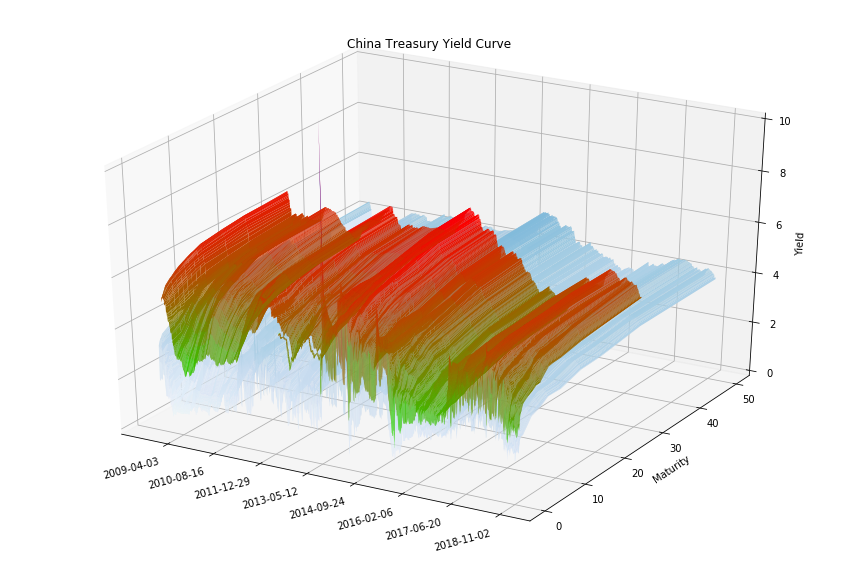

In [96]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='Blues', vmin=np.nanmin(z), vmax=np.nanmax(z))
ax.plot_surface(x_yield, y_yield, z_yield, rstride=1, cstride=1, cmap='brg_r', vmin=np.nanmin(z_yield), vmax=np.nanmax(z_yield))
ax.set_title('China Treasury Yield Curve')
ax.set_ylabel('Maturity')
ax.set_zlabel('Yield')

# SO question
def format_date(x, pos=None):
     return dates.num2date(x).strftime('%Y-%m-%d')

ax.w_xaxis.set_major_formatter(ticker.FuncFormatter(format_date))
for tl in ax.w_xaxis.get_ticklabels():
    tl.set_ha('right')
    tl.set_rotation(15)
ax.set_zlim(0, 10)
plt.show()
fig.savefig("Treasury Yield Curve.jpg",dpi=300,bbox_inches='tight')

In [47]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly 
plotly.tools.set_credentials_file(username='tzchao123', api_key='f7uxjH3CSj0eet05dvZb')

In [100]:
surface = go.Surface(x=x, y=y, z=z)
surface2 = go.Surface(x=x_yield, y=y_yield, z=z_yield)
data = [surface,surface2]
layout = go.Layout(
    title='Parametric Plot',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='jupyter-parametric_plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~tzchao123/0 or inside your plot.ly account where it is named 'jupyter-parametric_plot'
